In [4]:
## Deze Lineaire regressie
## 1. Imports
# Imports Dataframe
import pandas as pd
import numpy as np

# imports voor regressie
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# imports voor tekenen
import matplotlib.pyplot as plt 

# Bestand data
filepath = os.path.join("Data.txt")

In [5]:
## 2. Initialiseer teken opmaak
plt.rc("font", size=14)


In [6]:
## 3. Import csv data
# bestand ophalen

df = pd.read_csv(
    filepath, 
    parse_dates=['YYYYMMDD'],
    low_memory=False)[['YYYYMMDD','TN','TX','SP']]

# Periode van de mee te nemen data
df = df[(df['YYYYMMDD'] > '1950-12-31') & (df['YYYYMMDD'] < '2016-1-1')]

# Datum Verwijderen
df.drop(['YYYYMMDD'], axis=1, inplace=True)

#objecten weergeven in numerieke waarden
df = df.apply(pd.to_numeric, errors='coerce')

# Alle te gebruiken informatie tussen eind 1950 en begin 2016
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23741 entries, 0 to 23740
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TN      23698 non-null  float64
 1   TX      23698 non-null  float64
 2   SP      23498 non-null  float64
dtypes: float64(3)
memory usage: 741.9 KB


In [7]:
## 4. verder filteren van de dataframe
#Benamingen veranderingen op de originele benamingen van de dataset
df = df.rename(columns = {'TN': 'Min_Temp', 'TX': 'Max_Temp', 'SP':'Zonneschijnduur'}, inplace = False)

# Drop de rijen met nulwaarden bij
df.dropna(subset=['Max_Temp'],how="all",inplace=True)
df.dropna(subset=['Min_Temp'],how="all",inplace=True)
df.dropna(subset=['Zonneschijnduur'],how="all",inplace=True)

# De temperatuur naar bekende celsius waarde berekeken
df["Max_Temp"] = df["Max_Temp"] / 10
df["Min_Temp"] = df["Min_Temp"] / 10

# Zonneschijn definieren in binaire waarden (1 of 0, max zonneschijnduur is hoger dan 50%: ja of nee), en drop de afkomstige column.
df['Zon50plus'] = np.where(df['Zonneschijnduur']< 50, 0 ,1)
df.drop(
    ['Zonneschijnduur'], 
    axis=1, 
    inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23455 entries, 243 to 23740
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Min_Temp   23455 non-null  float64
 1   Max_Temp   23455 non-null  float64
 2   Zon50plus  23455 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 641.3 KB


In [8]:
## hieronder wordt de correlatie weergegeven van de variables.
df.corr()

,Min_Temp,Max_Temp,Zon50plus
Min_Temp,1.000000,0.870659,0.019047
Max_Temp,0.870659,1.000000,0.249097
Zon50plus,0.019047,0.249097,1.000000


In [9]:
## 5. Initialiseer Regressie waarden
X = df['Min_Temp'].values.reshape(-1,1)
y = df['Max_Temp']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Max_Temp')

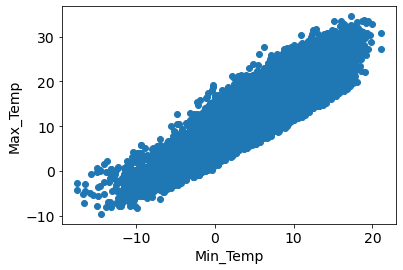

In [10]:
## 6. Tekenen van waarden
plt.rcParams['axes.facecolor'] = 'white'
plt.scatter(X,y)
plt.xlabel('Min_Temp')
plt.ylabel('Max_Temp')

Text(0, 0.5, 'Max_Temp')

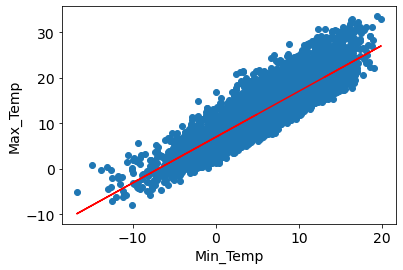

In [11]:
plt.scatter(X_test,y_test)
plt.plot(
    X_test, 
    lr.predict(X_test), 
    color='red',
    label='Linear')
plt.xlabel('Min_Temp')
plt.ylabel('Max_Temp')

In [12]:
## De predict geeft weer hoeveel grade het ongeveer zal worden als maximum bij een minimum temperatuur als invoer
# De score weergeeft hoe zuiver de predictie is
print(lr.predict([[10]]))
print(lr.score(X_test, y_test))

# De voorspelling kan worden gebruikt voor 

[16.98733505]
0.7651066131176332


In [13]:
X = df[['Min_Temp', 'Max_Temp']]
y = df['Zon50plus']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [14]:
kncl = KNeighborsClassifier(n_neighbors=2)
kncl.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [21]:
print(kncl.score(X_test,y_test))
# Voorspellingen zijn [Minimale temperatuur/ Maximale temperatuur]
# Bij uitkomst van 0 minder dan 50 procent zonneschijn
# Bij uitkomst van 1 meer dan 50 procent zonneschijn
print(kncl.predict([[23,33]]))
print(kncl.predict([[25,31]]))
print(kncl.predict([[0,5]]))

# Let Op!
# Hou de minimale temperatuur lager dan de maximale temperatuur.

0.6923896823704967
[0]
[1]
[0]
